In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Cargar Datos
Data = pd.read_csv('./Titanic-Dataset.csv')

# Mostrar Datos
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Descripción de los datos
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Manejar datos faltantes
Data['Age'].fillna(Data['Age'].mean(), inplace=True)
Data['Embarked'].fillna('S', inplace=True)

C:\Users\Alexander\AppData\Local\Temp\ipykernel_1220\4244746388.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['Age'].fillna(Data['Age'].mean(), inplace=True)
C:\Users\Alexander\AppData\Local\Temp\ipykernel_1220\4244746388.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [8]:
# Mostrar Datos
Data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Confirmación de columnas
Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: xlabel='Age'>

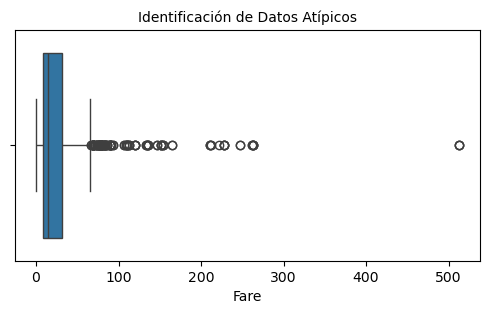

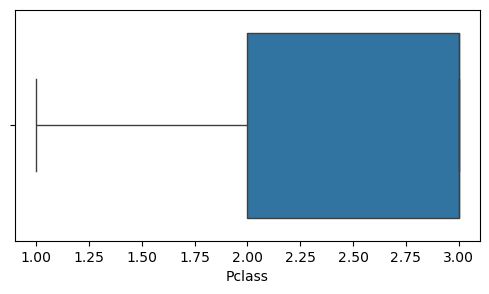

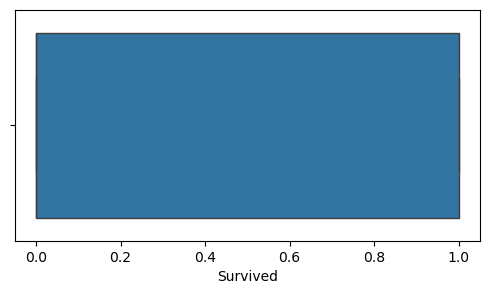

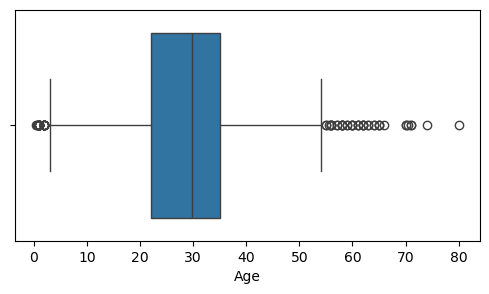

In [10]:
# Análisis exploratorio de datos
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Fare'])
plt.title('Identificación de Datos Atípicos', fontsize=10)

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Pclass'])

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Survived'])

plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['Age'])

In [11]:
# Definir límites para datos atípicos
max_fare = 300
min_fare = 0
total_fare = ((Data['Fare'] < min_fare) | (Data['Fare'] > max_fare)).sum()

print("Total registros dataset: {}".format(len(Data)))
print("El total de datos atípicos para los registros de tarifa es {}".format(total_fare))
print("")
Data.info()

Total registros dataset: 891
El total de datos atípicos para los registros de tarifa es 3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# Codificar variables categóricas
label_encoder = LabelEncoder()
Data['Sex'] = label_encoder.fit_transform(Data['Sex'])
Data['Embarked'] = label_encoder.fit_transform(Data['Embarked'])

In [13]:
# Selección de características
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = Data[features]
Y = Data['Survived']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [14]:
# Validar datos en train
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
105,3,1,28.0,0,0,7.8958,2
68,3,0,17.0,4,2,7.9250,2


In [15]:
# Validar datos en test
X_test.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,1,29.699118,0,0,14.4583,0
648,3,1,29.699118,0,0,7.5500,2


In [16]:
# Crear y entrenar el modelo de regresión logística
modelo_clasificacion = LogisticRegression(max_iter=1000)
modelo_clasificacion.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [17]:
# Realizar predicciones
Prediccion = modelo_clasificacion.predict(X_test)

In [18]:
# Evaluar el modelo
print('Accuracy:', accuracy_score(Y_test, Prediccion))
print('Precision:', precision_score(Y_test, Prediccion))
print('Recall:', recall_score(Y_test, Prediccion))
print('F1 Score:', f1_score(Y_test, Prediccion))

Accuracy: 0.7937219730941704
Precision: 0.7261904761904762
Recall: 0.7261904761904762
F1 Score: 0.7261904761904762


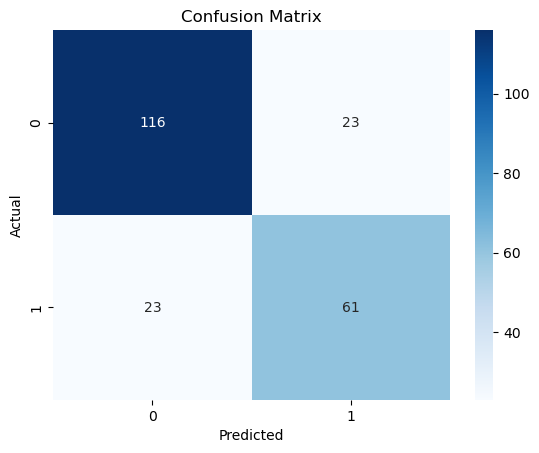

In [19]:
# Matriz de Confusión
conf_matrix = confusion_matrix(Y_test, Prediccion)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Coeficientes del Modelo
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': modelo_clasificacion.coef_[0]
})
print(coefficients)

    Feature  Coefficient
0    Pclass    -0.971747
1       Sex    -2.599718
2       Age    -0.038521
3     SibSp    -0.338193
4     Parch    -0.047463
5      Fare     0.001429
6  Embarked    -0.220504


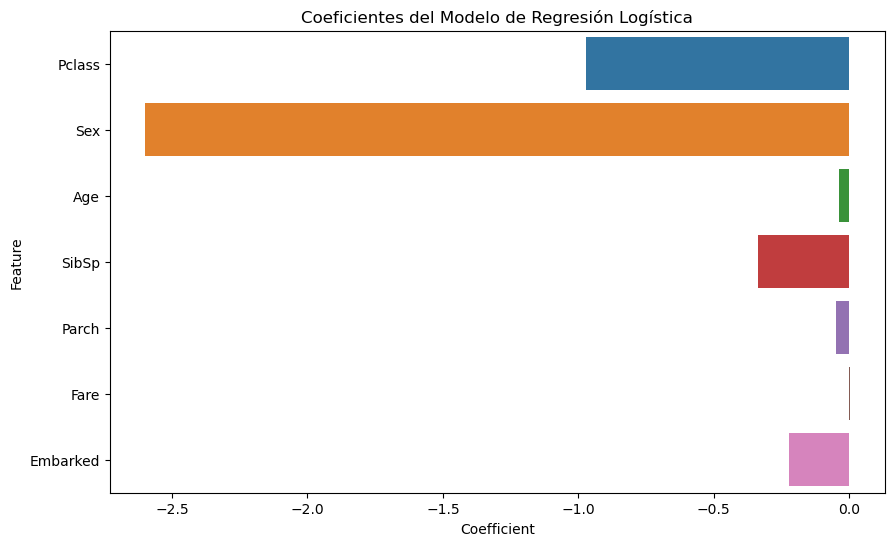

In [17]:
# Gráfica de Coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.show()